In [23]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_curve, auc
import seaborn as sns

In [24]:
dataF5 = pd.read_excel('Book5.xlsx')

In [25]:
dataF5_states=dataF5[['phase','student_level']]
dataF5_states

,phase,student_level
0,1,3
1,1,3
2,1,3
3,1,2
4,1,4
...,...,...
9995,5,2
9996,5,1
9997,5,1
9998,5,1


In [26]:
dataF5_without_task_variant=dataF5[['p1','k1','s1','t1','a1','p2','k2','s2','t2','a2','p3','k3','s3','t3','a3','p4','k4','s4','t4','a4','p5','k5','s5','t5','a5'
]]
dataF5_without_task_variant


,p1,k1,s1,t1,a1,p2,k2,s2,t2,a2,...,p4,k4,s4,t4,a4,p5,k5,s5,t5,a5
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,1,1,1,1,0,1,1,0,...,1,1,0,1,0,1,1,1,1,1
9996,1,1,0,0,1,0,1,0,0,0,...,0,1,0,1,1,1,1,0,1,0
9997,1,1,0,1,0,0,1,1,0,1,...,1,1,1,0,1,1,1,1,1,1
9998,1,1,1,0,1,1,1,1,1,0,...,0,1,1,1,0,1,1,0,1,0


In [27]:
dataF5_with_task_variant=dataF5[['task_variant']]
dataF5_with_task_variant

,task_variant
0,1
1,1
2,1
3,3
4,1
...,...
9995,1
9996,3
9997,2
9998,1


In [40]:
del classifier

In [41]:
# CNN

target=label_binarize(dataF5_with_task_variant,classes=[1,2,3])
x=dataF5_without_task_variant
y=target


target = label_binarize(dataF5_with_task_variant, classes=[1, 2, 3])
x = dataF5_without_task_variant
y = target

X_train_DL, X_test_DL, Y_train_DL, Y_test_DL = train_test_split(x, y, test_size=0.2)
print(f'len(X_train_DL) = {len(X_train_DL)}\nlen(X_test_DL) = {len(X_test_DL)}\nlen(Y_train_DL) = {len(Y_train_DL)}\nlen(Y_test_DL) = {len(Y_test_DL)}\n')
print('-----------------------------------result for deep learning-----------------------------------------\n')

# Define model
classifier = Sequential()
# first hidden layer
classifier.add(Dense(24, activation='relu', kernel_initializer='random_normal', input_dim=X_train_DL.shape[1]))
classifier.add(Dropout(0.2))
# second hidden layer
classifier.add(Dense(24, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.2))
# output layer
classifier.add(Dense(3, activation='sigmoid', kernel_initializer='random_normal'))

# Compile model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = classifier.fit(X_train_DL.values, Y_train_DL, validation_data=(X_test_DL, Y_test_DL), batch_size=10, epochs=100)

# Predictions
y_prediction_DL = classifier.predict(X_test_DL)
y_prediction_DL = (y_prediction_DL > 0.5) * 1

print(f'y_prediction_DL =\n{y_prediction_DL}\nY_test_DL =\n{Y_test_DL}\n')



len(X_train_DL) = 8000
len(X_test_DL) = 2000
len(Y_train_DL) = 8000
len(Y_test_DL) = 2000

-----------------------------------result for deep learning-----------------------------------------

Epoch 1/100


C:\Users\parspooya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5195 - loss: 0.5840 - val_accuracy: 0.6915 - val_loss: 0.4318
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6964 - loss: 0.4174 - val_accuracy: 0.7735 - val_loss: 0.3481
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7630 - loss: 0.3516 - val_accuracy: 0.8130 - val_loss: 0.2867
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8136 - loss: 0.2970 - val_accuracy: 0.8275 - val_loss: 0.2575
Epoch 5/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8151 - loss: 0.2757 - val_accuracy: 0.8505 - val_loss: 0.2279
Epoch 6/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8388 - loss: 0.2523 - val_accuracy: 0.8795 - val_loss: 0.2078
Epoch 7/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8550 - loss: 0.2284 - val_accuracy: 0.8815 - val_loss: 0.1932
Epoch 8/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8695 - loss: 0.2145 - val_accuracy: 0.9030

In [42]:
# evaluation of CNN
print('-----------------------------------evaluation-----------------------------------------')
acc_dl = accuracy_score(Y_test_DL, y_prediction_DL)
mea_dl = np.mean(np.square(Y_test_DL - y_prediction_DL))
cr_dl = classification_report(Y_test_DL, y_prediction_DL)
f1 = f1_score(Y_test_DL, y_prediction_DL, average='weighted')
precision = precision_score(Y_test_DL, y_prediction_DL, average='weighted')
recall = recall_score(Y_test_DL, y_prediction_DL, average='weighted') 

print(f'accuracy score deep learning = {acc_dl*100:.2f}%\n')
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print(f'mean squared error deep learning = {mea_dl}\n')
print(f'classification report deep learning =\n{cr_dl}\n')

-----------------------------------evaluation-----------------------------------------
accuracy score deep learning = 97.00%

F1 Score: 0.9740067202693267
Precision: 0.970885270958657
Recall: 0.9775
mean squared error deep learning = 0.0175

classification report deep learning =
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       993
           1       0.93      0.98      0.95       569
           2       0.97      0.96      0.97       438

   micro avg       0.97      0.98      0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.98      0.97      2000
 samples avg       0.97      0.98      0.97      2000




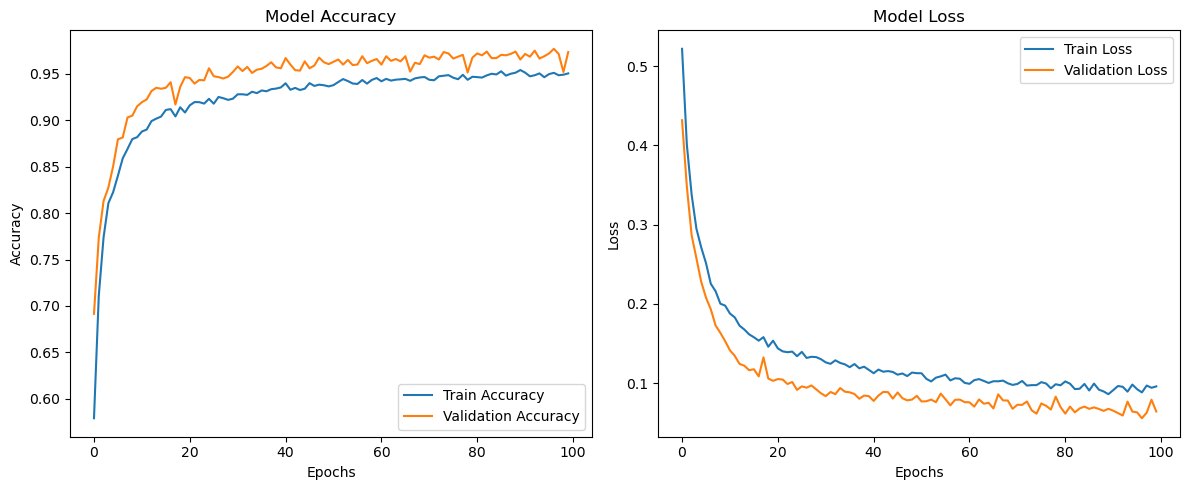

In [43]:
# Plotting
# Accuracy and Loss Curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()


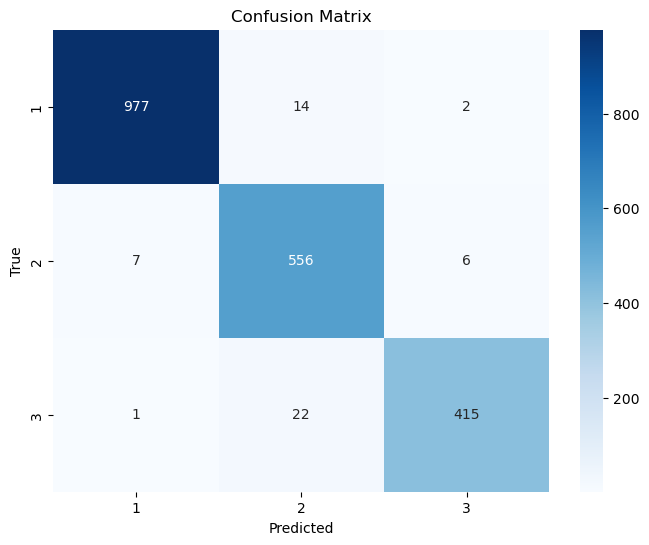

In [44]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test_DL.argmax(axis=1), y_prediction_DL.argmax(axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

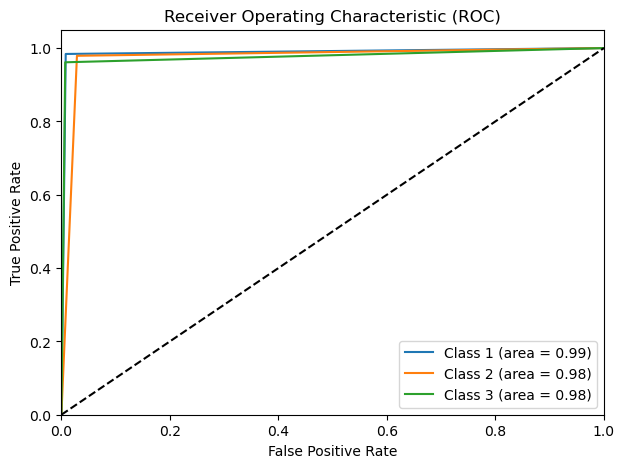

In [51]:
# ROC and AUC
plt.figure(figsize=(7, 5))
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(Y_test_DL[:, i], y_prediction_DL[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i+1} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()